# Python Programming Project - Alzheimey Dataset

# EDA on Datasets

### Data Loading

In [161]:
import pandas as pd

df = pd.read_csv('https://data.cdc.gov/resource/hfr9-rurv.csv')


In [162]:
df.head()

,rowid,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,...,stratification2,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [163]:
df.dtypes

rowid                          object
yearstart                       int64
yearend                         int64
locationabbr                   object
locationdesc                   object
datasource                     object
class                          object
topic                          object
question                       object
data_value_unit                object
datavaluetypeid                object
data_value_type                object
data_value                    float64
data_value_alt                float64
data_value_footnote_symbol     object
data_value_footnote            object
low_confidence_limit          float64
high_confidence_limit         float64
stratificationcategory1        object
stratification1                object
stratificationcategory2        object
stratification2                object
geolocation                    object
classid                        object
topicid                        object
questionid                     object
locationid  

### Transform the data

In [164]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Replacing missing values (example: replacing NaNs with a placeholder or mean/median)
# df.fillna(value={'column_name': 'placeholder_value'}, inplace=True)  # Replace 'column_name' with actual column names

# Discovering invalid values
# Example: Checking for unexpected data types or outliers
invalid_values_summary = df.describe(include='all')
invalid_values_summary


,rowid,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,...,stratification2,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
count,1000,1000.000000,1000.00000,1000,1000,1000,1000,1000,1000,1000,...,874,930,1000,1000,1000,1000.000000,1000,1000,1000,1000
unique,770,NaN,NaN,59,59,1,7,35,35,2,...,7,54,7,35,35,NaN,1,3,3,8
top,BRFSS~2022~2022~05~Q12~TSC01~AGE~RACE,NaN,NaN,HI,Hawaii,BRFSS,Screenings and Vaccines,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-157.8577494 21.30485044),C03,TMC01,Q03,NaN,AGE,5064,RACE,BLK
freq,5,NaN,NaN,32,32,1000,435,119,119,978,...,144,32,435,119,119,NaN,1000,342,665,144
mean,NaN,2021.754000,2021.83600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,586.863000,NaN,NaN,NaN,NaN
std,NaN,0.904601,0.80979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2164.749834,NaN,NaN,NaN,NaN
min,NaN,2015.000000,2015.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2022.000000,2022.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
50%,NaN,2022.000000,2022.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN
75%,NaN,2022.000000,2022.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN


### Checking for missing values and also their percentage

In [165]:
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

print(30*'---')

missing_percentage = (df.isna().sum() / len(df)) * 100
print("Percentage of missing values:\n", missing_percentage)

Missing values in each column:
 rowid                           0
yearstart                       0
yearend                         0
locationabbr                    0
locationdesc                    0
datasource                      0
class                           0
topic                           0
question                        0
data_value_unit                 0
datavaluetypeid                 0
data_value_type                 0
data_value                    326
data_value_alt                326
data_value_footnote_symbol    671
data_value_footnote           671
low_confidence_limit          326
high_confidence_limit         326
stratificationcategory1         0
stratification1                 0
stratificationcategory2       126
stratification2               126
geolocation                    70
classid                         0
topicid                         0
questionid                      0
locationid                      0
stratificationcategoryid1       0
stratificationid

### Imputing the numerical columns by mean

In [166]:
float_numerical_columns = df.select_dtypes(include=['float64']).columns

for col in float_numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

df[float_numerical_columns].isna().sum()

data_value               0
data_value_alt           0
low_confidence_limit     0
high_confidence_limit    0
dtype: int64

### Imputing the categorical columns by frequency/mode

In [168]:
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df[categorical_columns].isna().sum()

rowid                         0
locationabbr                  0
locationdesc                  0
datasource                    0
class                         0
topic                         0
question                      0
data_value_unit               0
datavaluetypeid               0
data_value_type               0
data_value_footnote_symbol    0
data_value_footnote           0
stratificationcategory1       0
stratification1               0
stratificationcategory2       0
stratification2               0
geolocation                   0
classid                       0
topicid                       0
questionid                    0
stratificationcategoryid1     0
stratificationid1             0
stratificationcategoryid2     0
stratificationid2             0
dtype: int64

### Summary of numerical columns

In [169]:
numerical_summary = df.describe()
numerical_summary

,yearstart,yearend,data_value,data_value_alt,low_confidence_limit,high_confidence_limit,locationid
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2021.754000,2021.83600,41.900148,41.900148,36.446884,47.470920,586.863000
std,0.904601,0.80979,18.906948,18.906948,18.190089,19.601768,2164.749834
min,2015.000000,2015.00000,3.600000,3.600000,1.900000,5.000000,1.000000
25%,2022.000000,2022.00000,32.850000,32.850000,26.700000,38.675000,18.000000
50%,2022.000000,2022.00000,41.900148,41.900148,36.446884,47.470920,32.000000
75%,2022.000000,2022.00000,47.900000,47.900000,41.425000,54.875000,48.000000
max,2022.000000,2022.00000,91.600000,91.600000,86.900000,94.700000,9004.000000


#### The summary of numerical columns usually provides us features with count, mean, median, standard deviation, quartile analysis of every column in the dataset.

### Summary of categorical columns

In [170]:
categorical_summary = df.select_dtypes(include=['object', 'category', 'bool']).describe()
categorical_summary

,rowid,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,datavaluetypeid,data_value_type,...,stratificationcategory2,stratification2,geolocation,classid,topicid,questionid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,770,59,59,1,7,35,35,2,2,2,...,2,7,54,7,35,35,1,3,3,8
top,BRFSS~2022~2022~05~Q12~TSC01~AGE~RACE,HI,Hawaii,BRFSS,Screenings and Vaccines,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,Percentage,...,Race/Ethnicity,"Black, non-Hispanic",POINT (-157.8577494 21.30485044),C03,TMC01,Q03,AGE,5064,RACE,BLK
freq,5,32,32,1000,435,119,119,978,978,978,...,791,270,102,435,119,119,1000,342,665,144


#### The summary of categorical columns usually provides us features with number of unique values in the columns and top cout category in the column. From this summary we can summarize which category is dominating on certain features/series in a dataset.

# Data Visualization

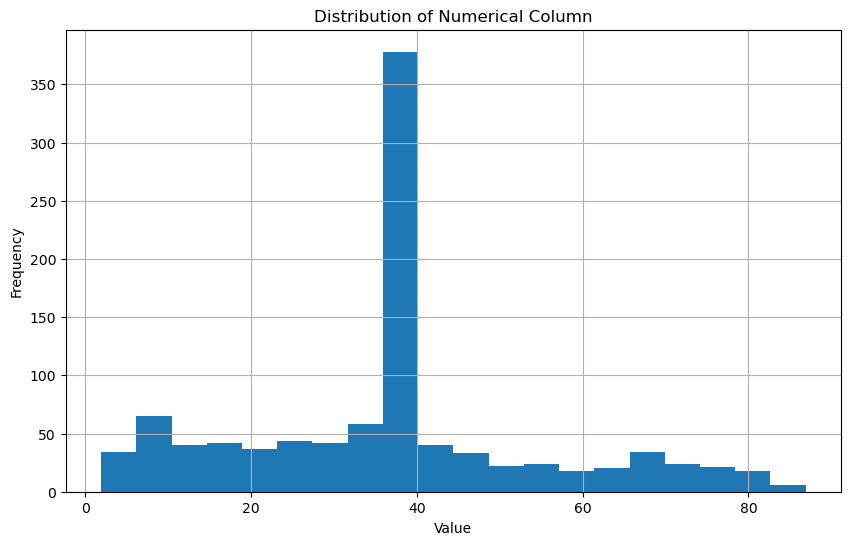

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['low_confidence_limit'].hist(bins=20)
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


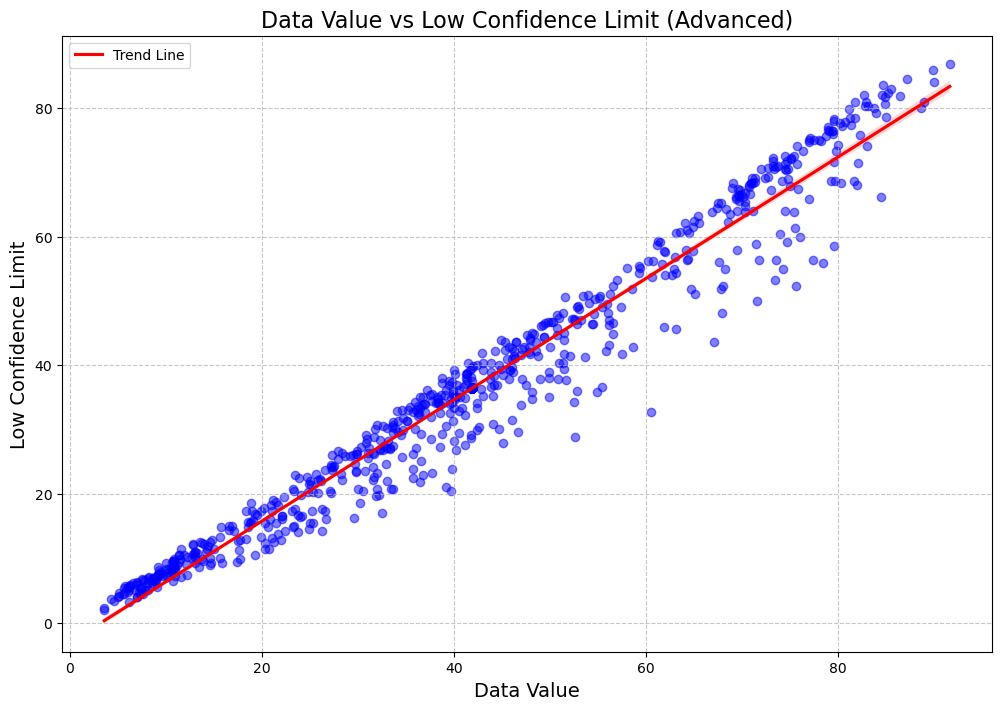

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

sns.regplot(
    x='data_value',
    y='low_confidence_limit',
    data=df,
    scatter_kws={'color': 'blue', 'alpha': 0.5},
    line_kws={'color': 'red', 'label': 'Trend Line'},
)

plt.title('Data Value vs Low Confidence Limit (Advanced)', fontsize=16)
plt.xlabel('Data Value', fontsize=14)
plt.ylabel('Low Confidence Limit', fontsize=14)

plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.legend()

plt.show()


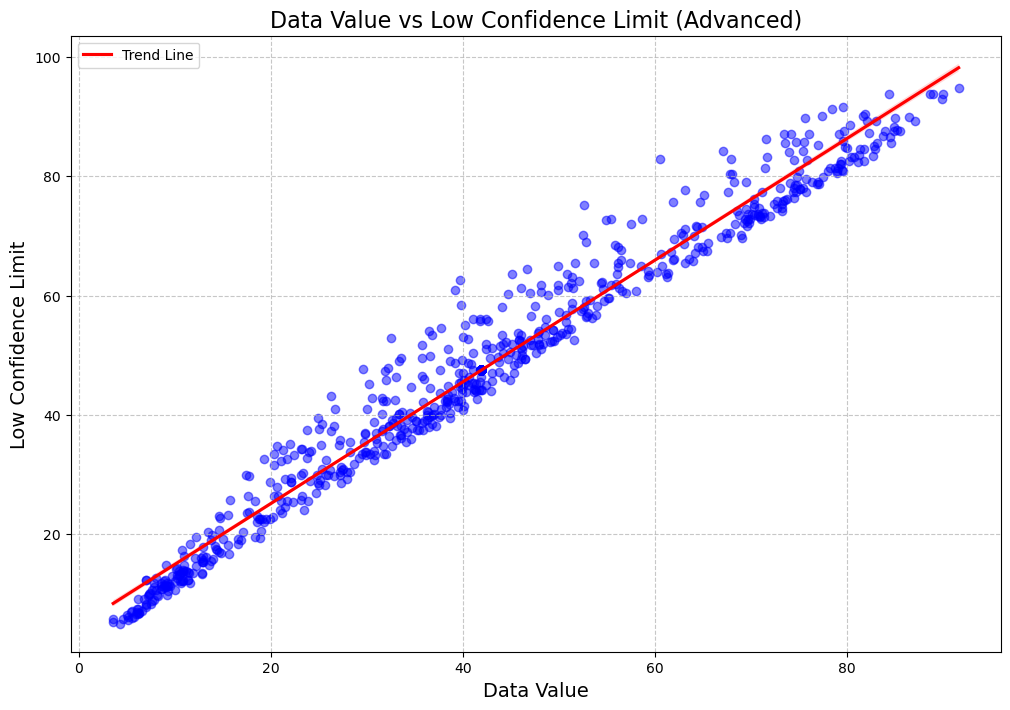

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Create a scatter plot with a regression line
sns.regplot(
    x='data_value',
    y='high_confidence_limit',
    data=df,
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Customize scatter points
    line_kws={'color': 'red', 'label': 'Trend Line'},  # Customize regression line
)

# Add labels and a title
plt.title('Data Value vs Low Confidence Limit (Advanced)', fontsize=16)
plt.xlabel('Data Value', fontsize=14)
plt.ylabel('Low Confidence Limit', fontsize=14)

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show legend
plt.legend()

# Show the plot
plt.show()


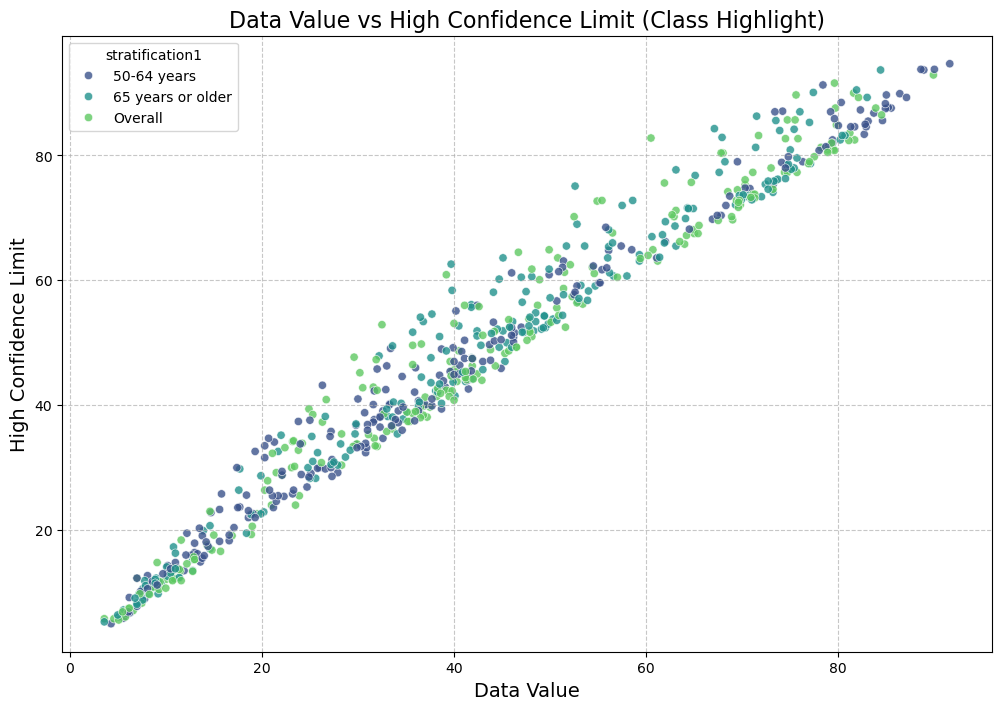

In [147]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='data_value',
    y='high_confidence_limit',
    hue='stratification1',
    data=df,
    palette='viridis',
    alpha=0.8,
)

plt.title('Data Value vs High Confidence Limit (Class Highlight)', fontsize=16)
plt.xlabel('Data Value', fontsize=14)
plt.ylabel('High Confidence Limit', fontsize=14)

plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.show()


# Analysis of Scatter Plot: Data Value vs High Confidence Limit

## Key Insights:

### Variables:
- **X-axis:** `Data Value` - This represents a key numeric metric in the dataset.
- **Y-axis:** `High Confidence Limit` - Another numeric metric representing the upper bound of a statistical confidence interval.

### Data Segmentation:
The data points are color-coded based on the `stratification1` column, which categorizes the data into three groups:
1. **50-64 years:** Represented by blue points.
2. **65 years or older:** Represented by green points.
3. **Overall:** Represented by teal points.

### Observations:
1. **Positive Linear Relationship:**
   - There is a clear linear trend between `Data Value` and `High Confidence Limit`, suggesting a strong positive correlation. As the `Data Value` increases, the `High Confidence Limit` also increases proportionally.

3. **Range of Values:**
   - `Data Value` ranges roughly from **0 to 80**.
   - `High Confidence Limit` ranges roughly from **0 to 90**.


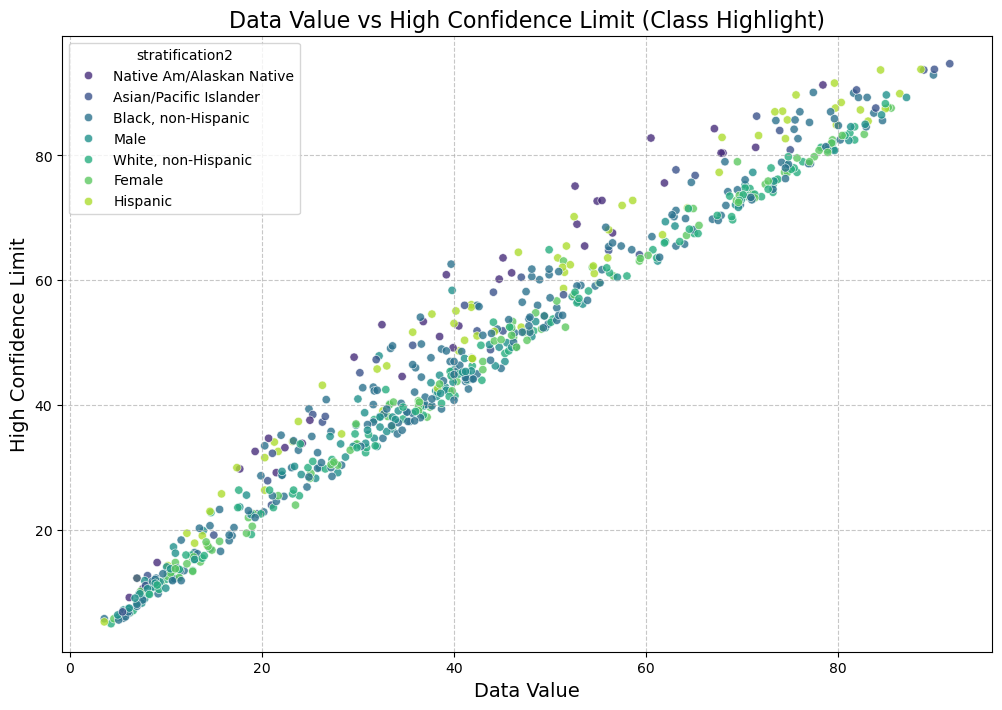

In [142]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='data_value',
    y='high_confidence_limit',
    hue='stratification2',
    data=df,
    palette='viridis',
    alpha=0.8,
)

plt.title('Data Value vs High Confidence Limit (Class Highlight)', fontsize=16)
plt.xlabel('Data Value', fontsize=14)
plt.ylabel('High Confidence Limit', fontsize=14)

plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.show()


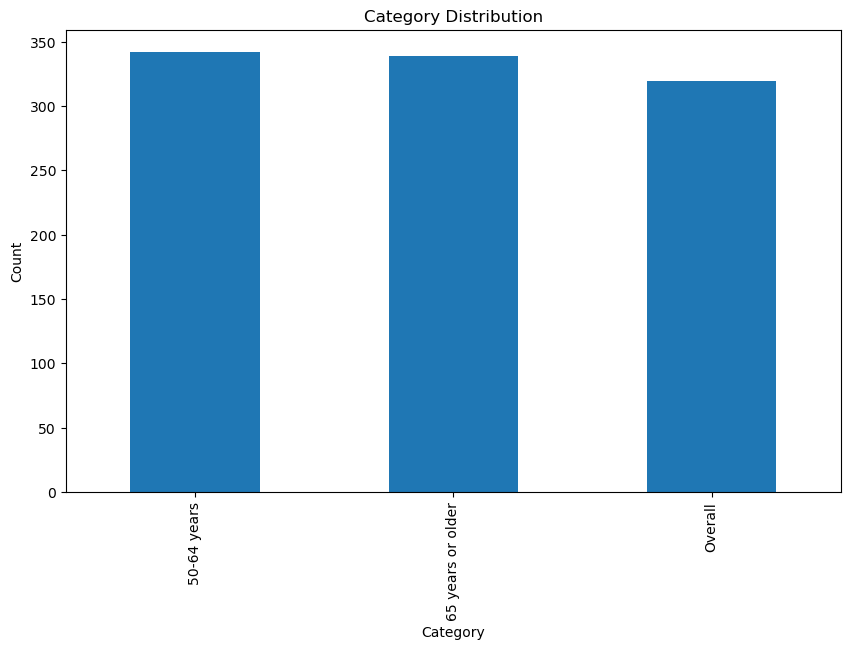

In [123]:
# Bar plot for a categorical column
df['stratification1'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


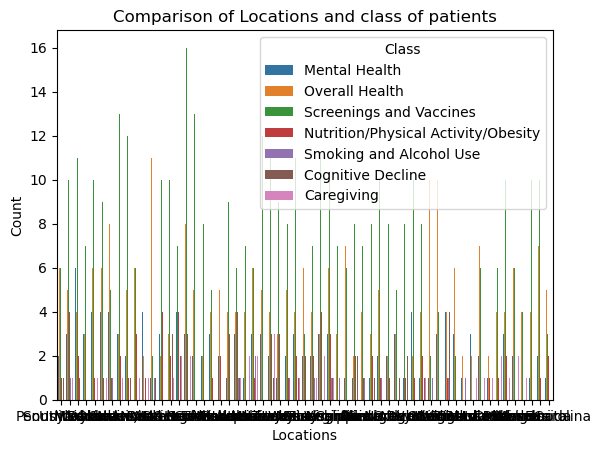

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='locationdesc', hue='class')
plt.title("Comparison of Locations and class of patients")
plt.xlabel("Locations")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()

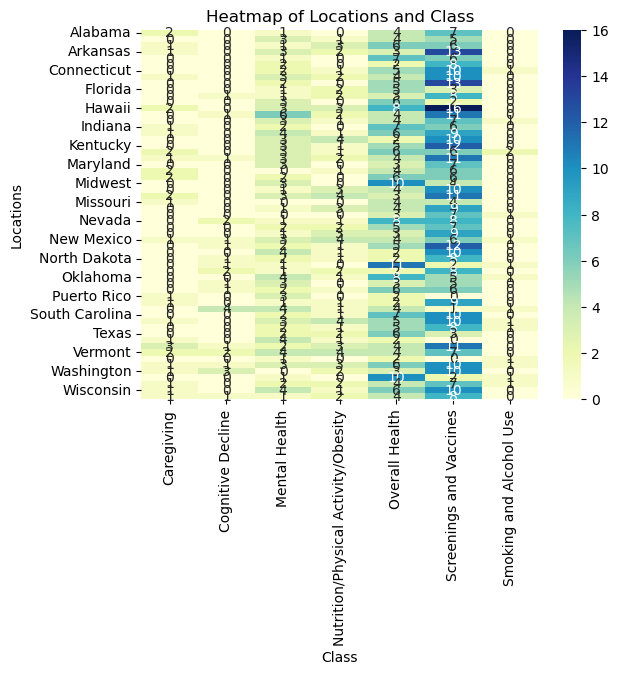

In [156]:
heatmap_data = pd.crosstab(df['locationdesc'], df['class'])

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Locations and Class")
plt.xlabel("Class")
plt.ylabel("Locations")
plt.show()